# Data Visualization - A Tutorial with Python (Part - II)

In [2]:
#Load the libraries
import pandas as pd
import numpy as np
from plotnine import *

In [3]:
# Read the data
murders = pd.read_csv('data/murders2022.csv')
murders['Population'] = murders['pop']/(10**6) #Population in millions

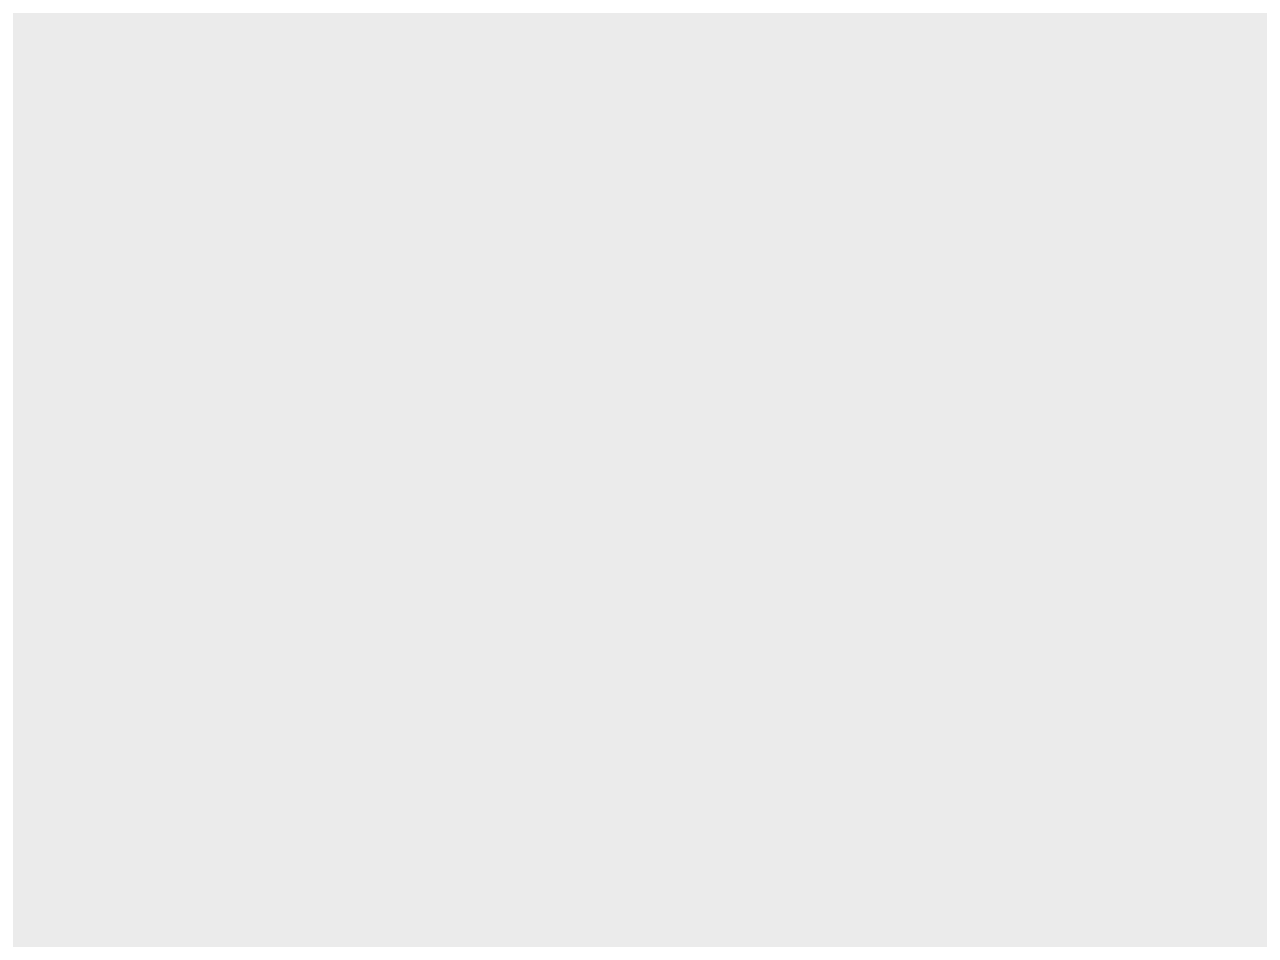

In [4]:
ggplot(data=murders)

In [5]:
p = ggplot(data=murders)

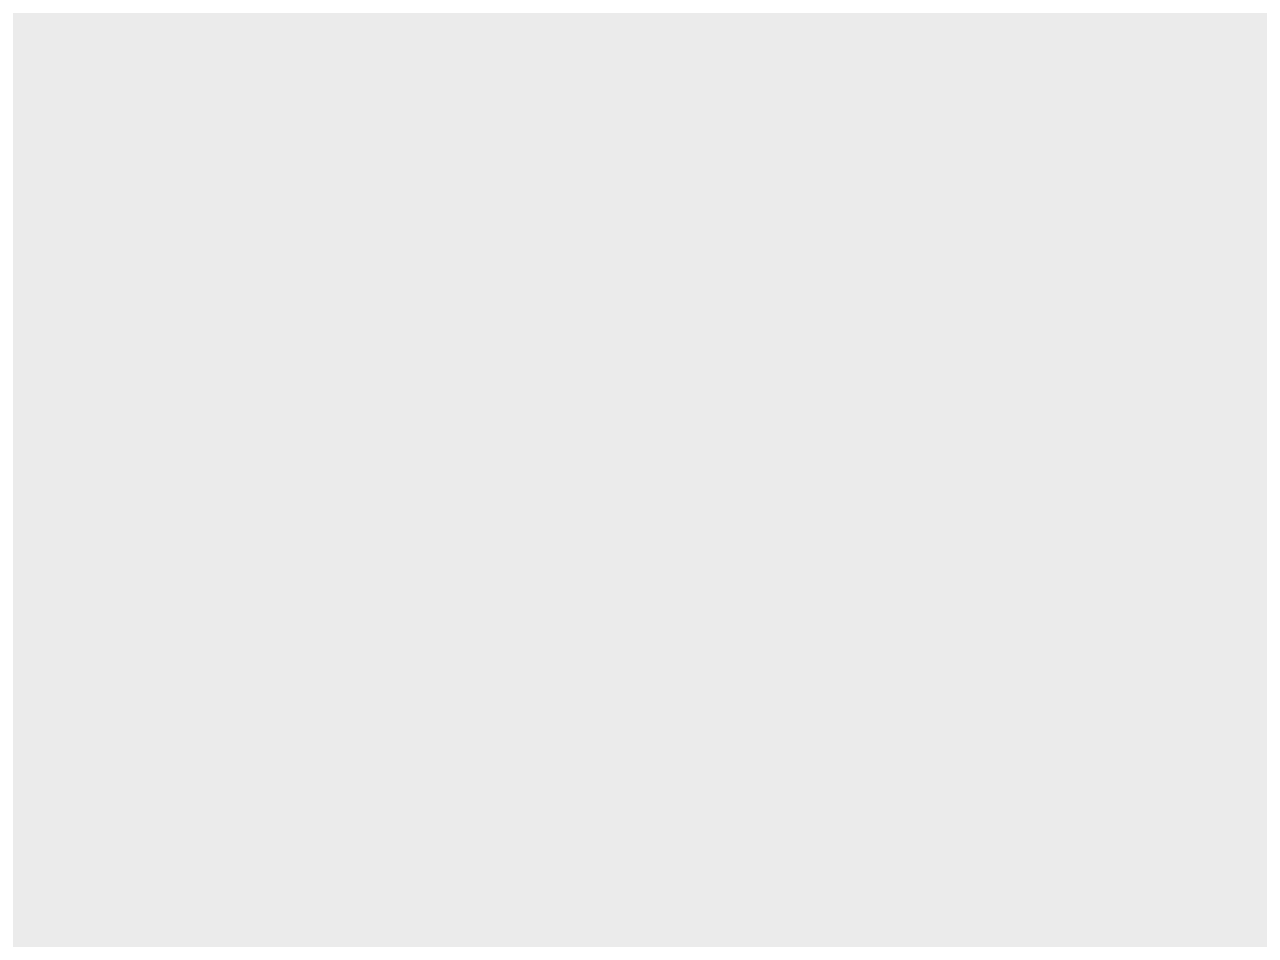

In [6]:
p.show()

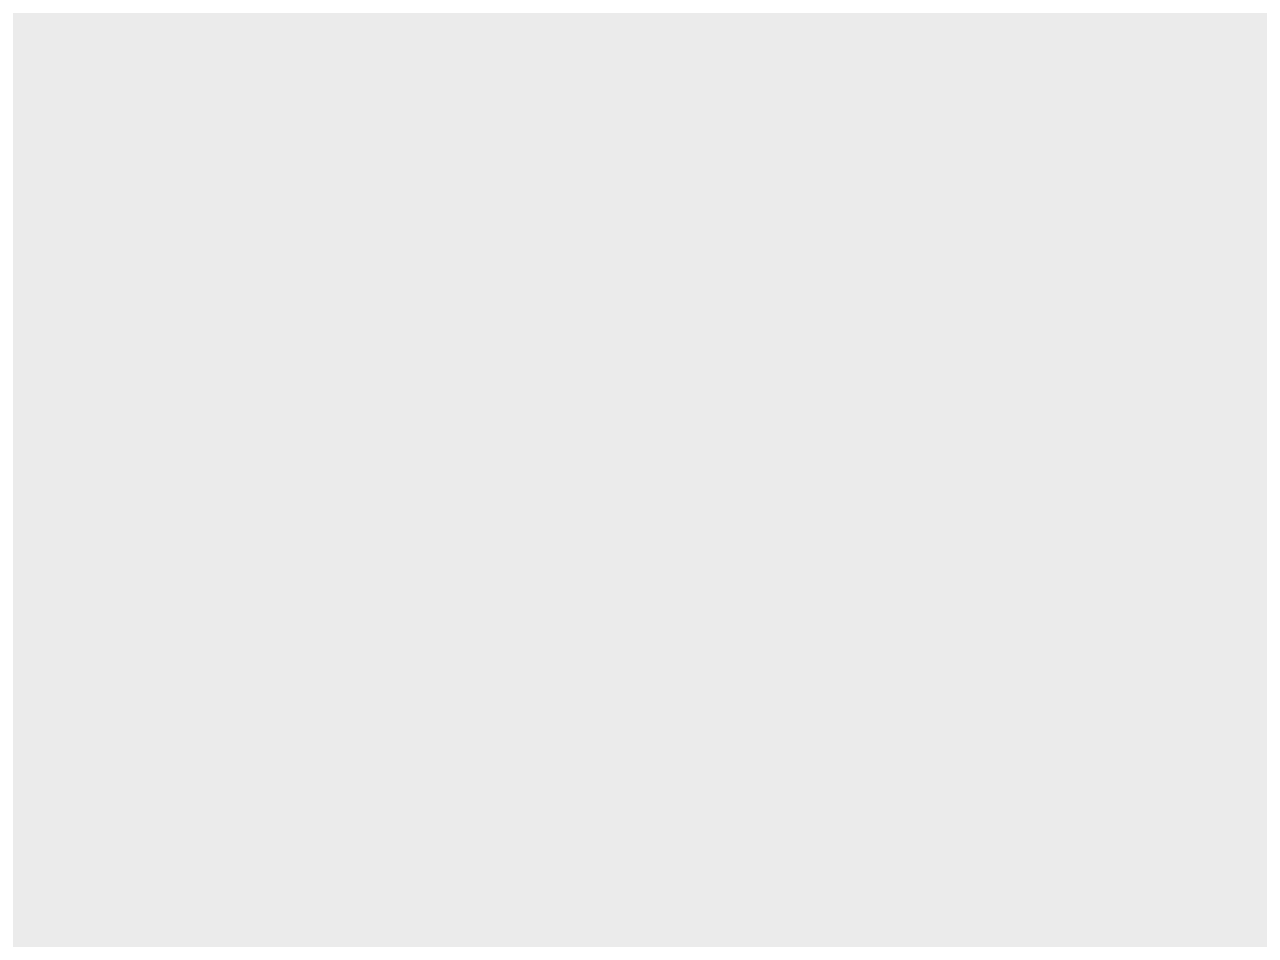

In [7]:
p

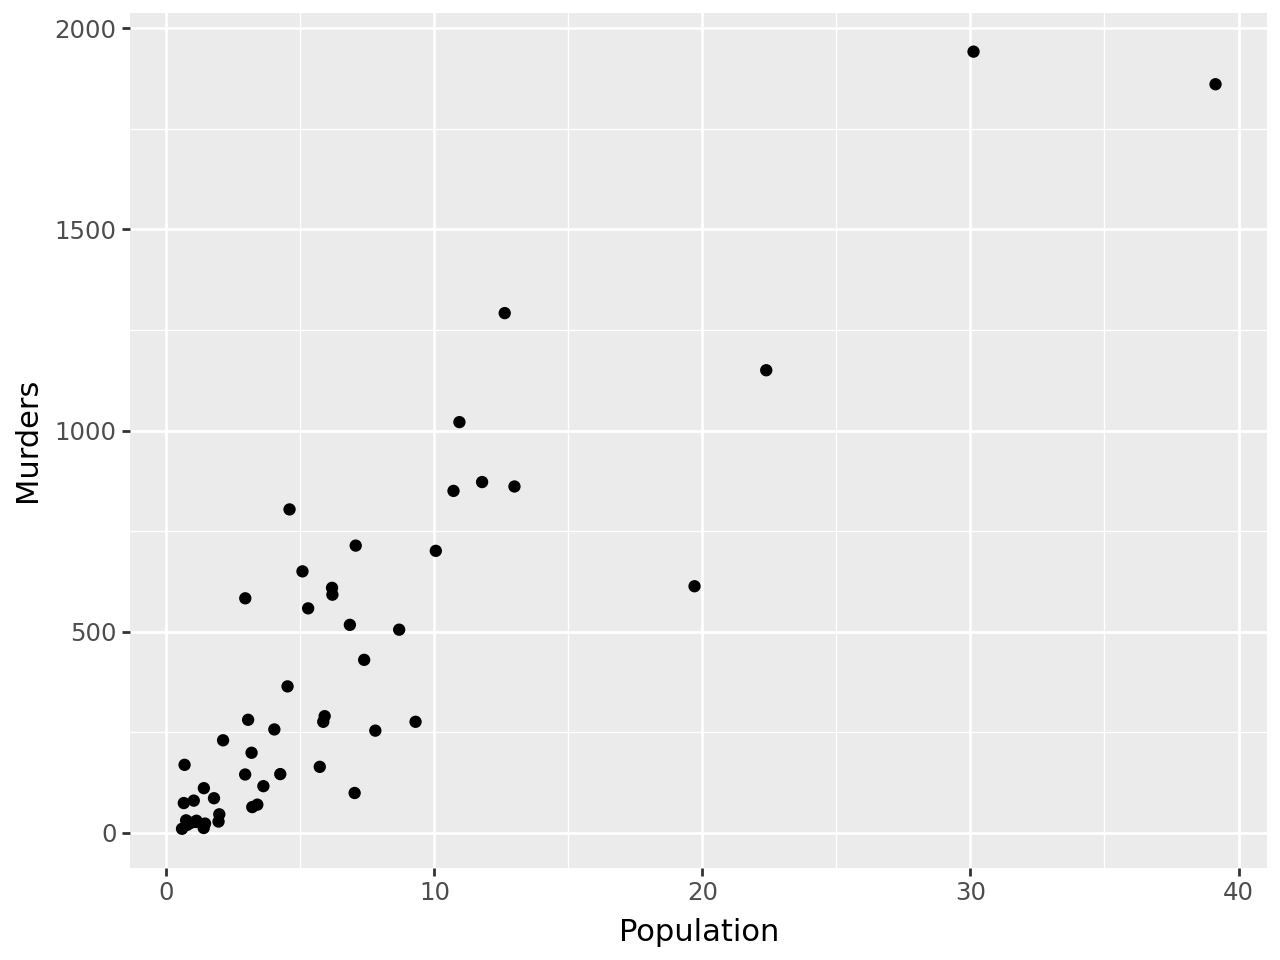

In [8]:
murders >> ggplot() + geom_point(aes('Population', 'Murders'))

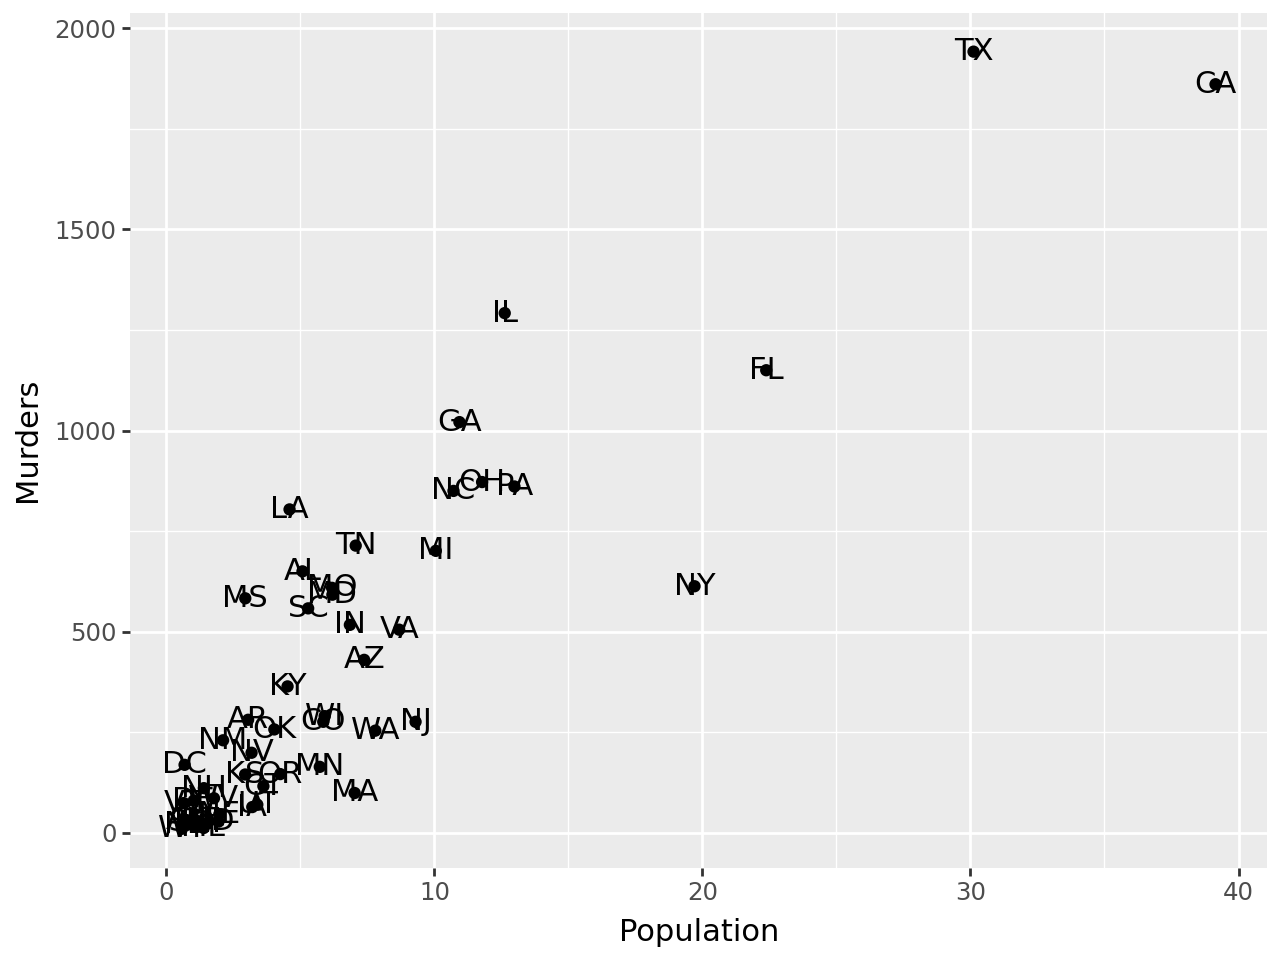

In [9]:
murders >> (ggplot() + geom_point(aes('Population', 'Murders')) +
            geom_text(aes('Population', 'Murders', label = 'State')))

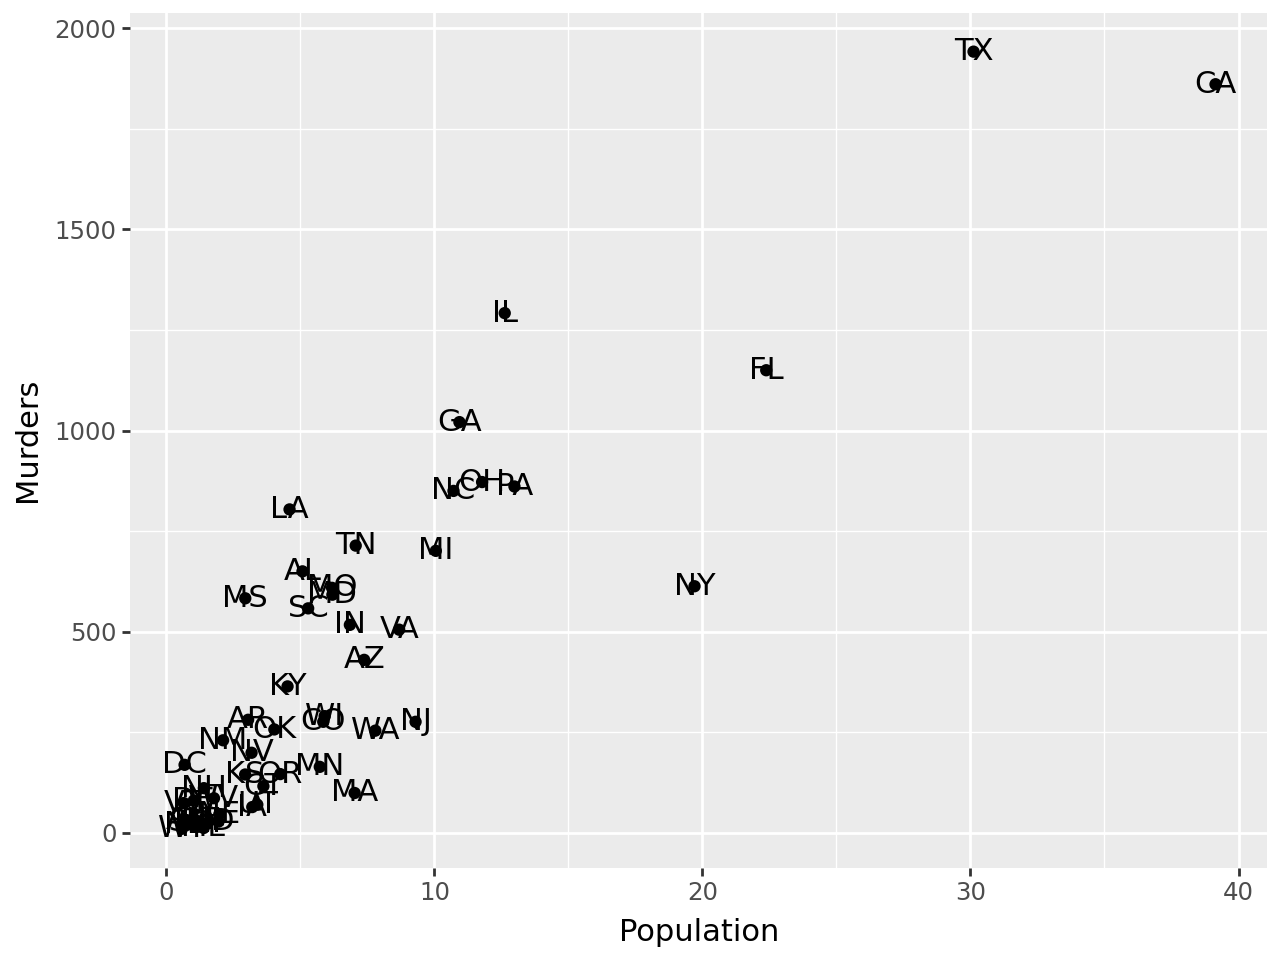

In [10]:
murders >> (ggplot(aes('Population', 'Murders') ) + geom_point() +
  geom_text(aes(label = 'State')))

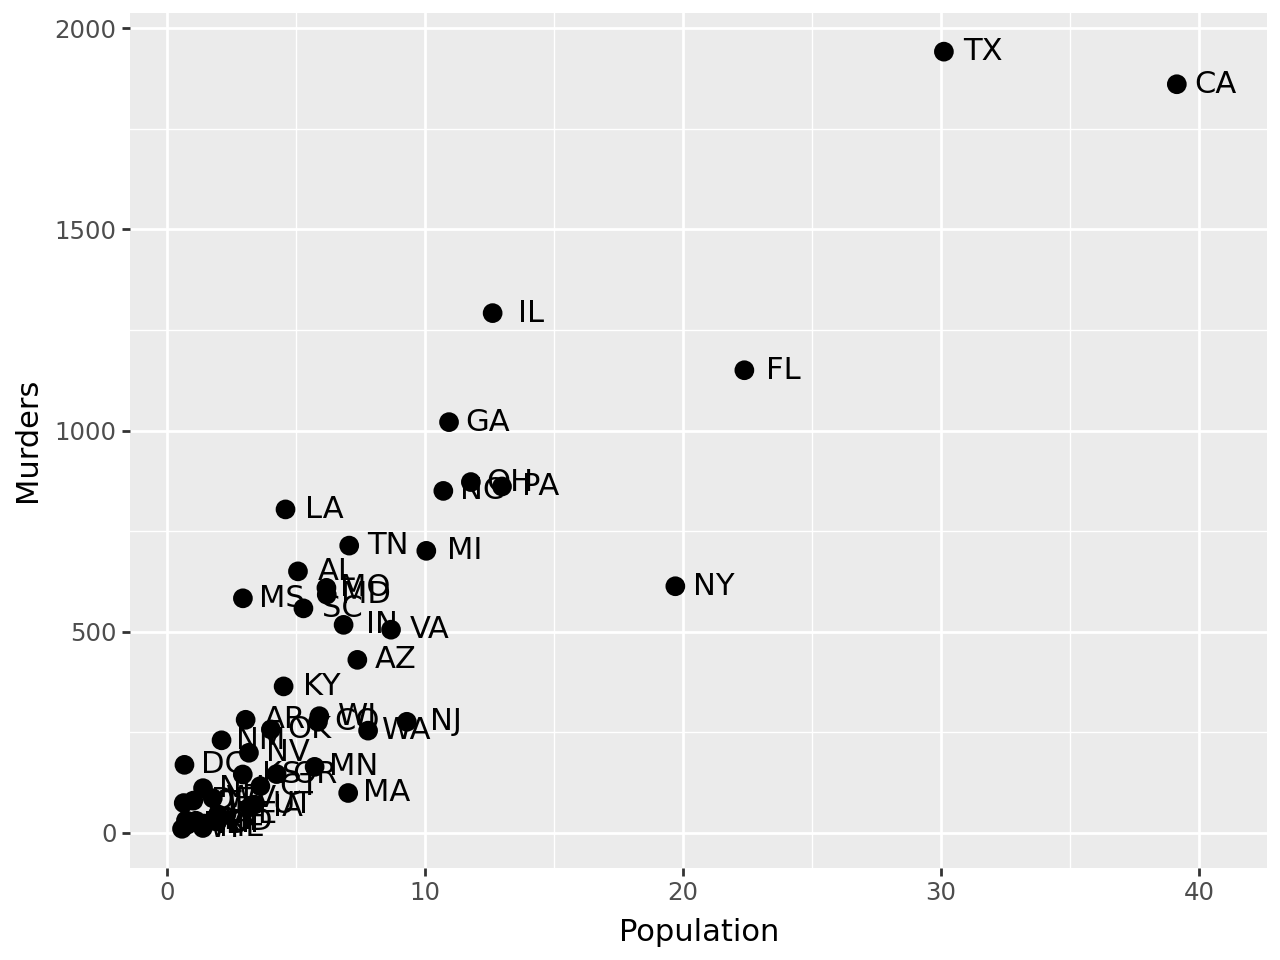

In [11]:
murders >> (ggplot(aes('Population', 'Murders') ) + geom_point(size=3) +
          geom_text(aes(label = "State"), nudge_x=1.5))

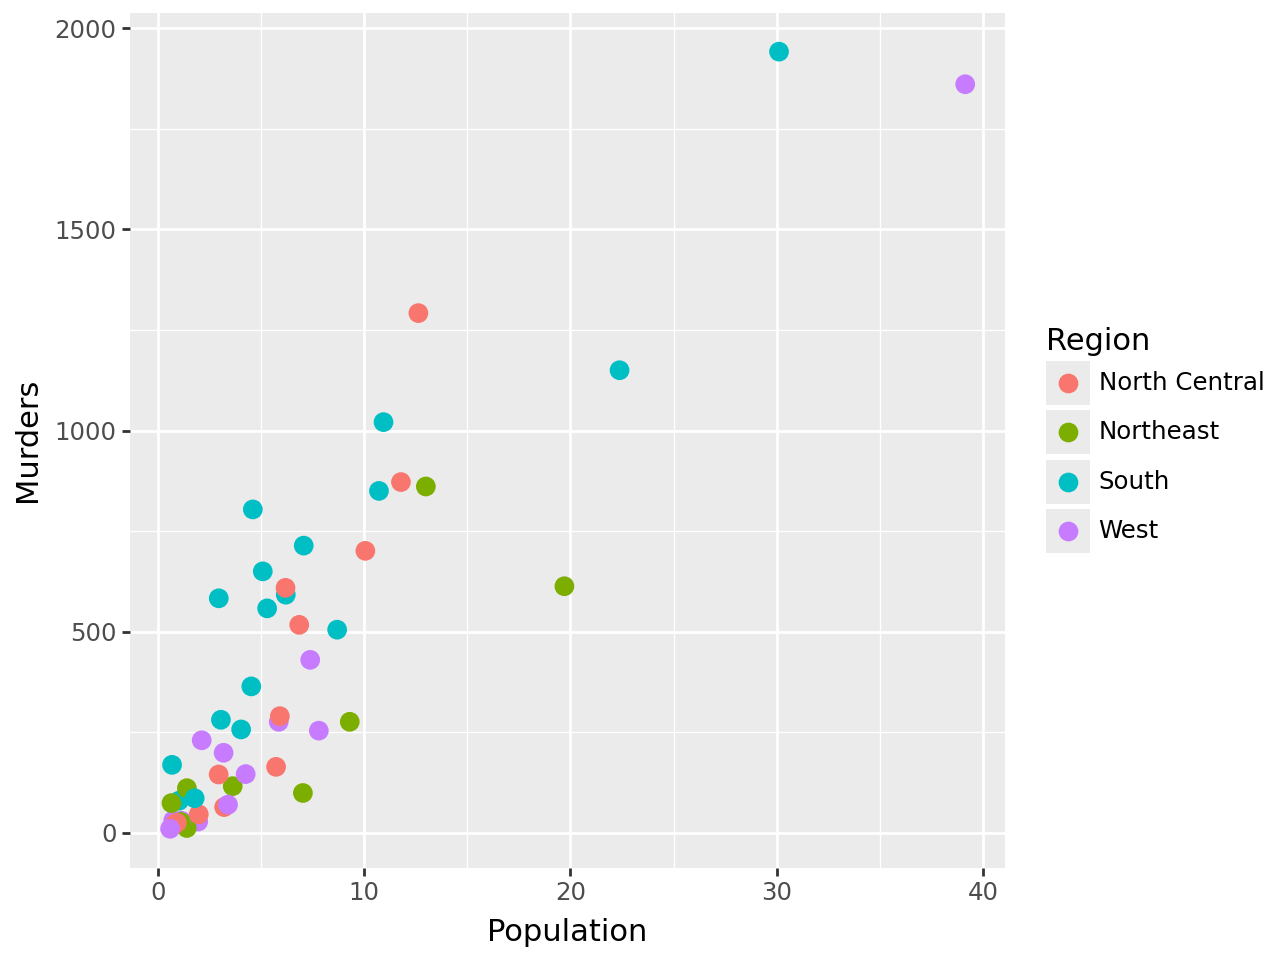

In [12]:
murders >> (ggplot(aes('Population', 'Murders') ) + 
 geom_point(aes(color='Region'),size=3) )

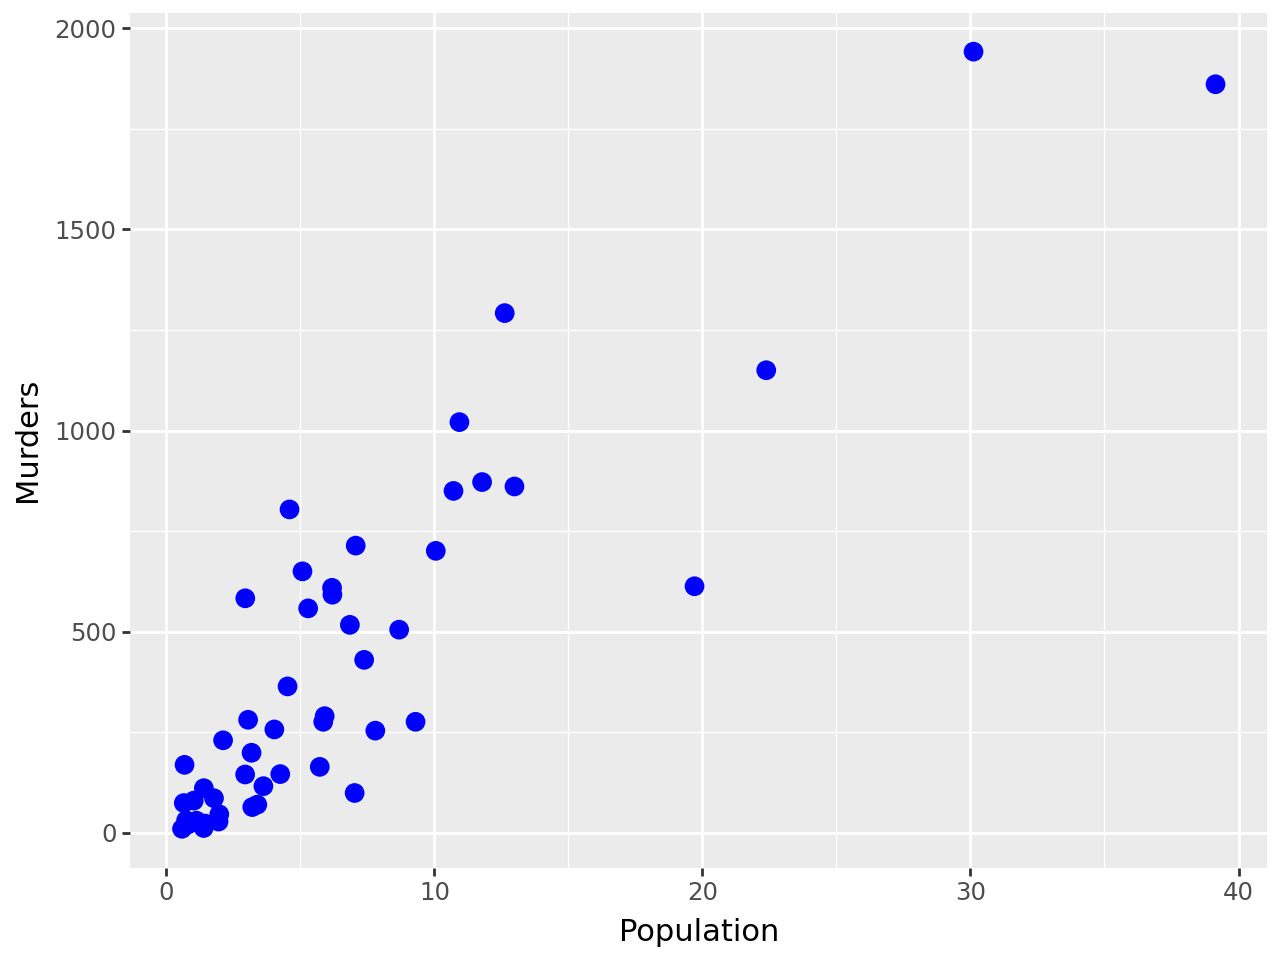

In [13]:
murders >> (ggplot(aes('Population', 'Murders') ) + 
 geom_point(color='blue',size=3) )

In [14]:
p0 = murders >> ggplot(aes('Population', 'Murders') )
p1 = p0 + geom_point(aes(color = 'Region'), size = 3)
p2 = p1 + geom_text(aes(label = "State"), nudge_x=0.1)

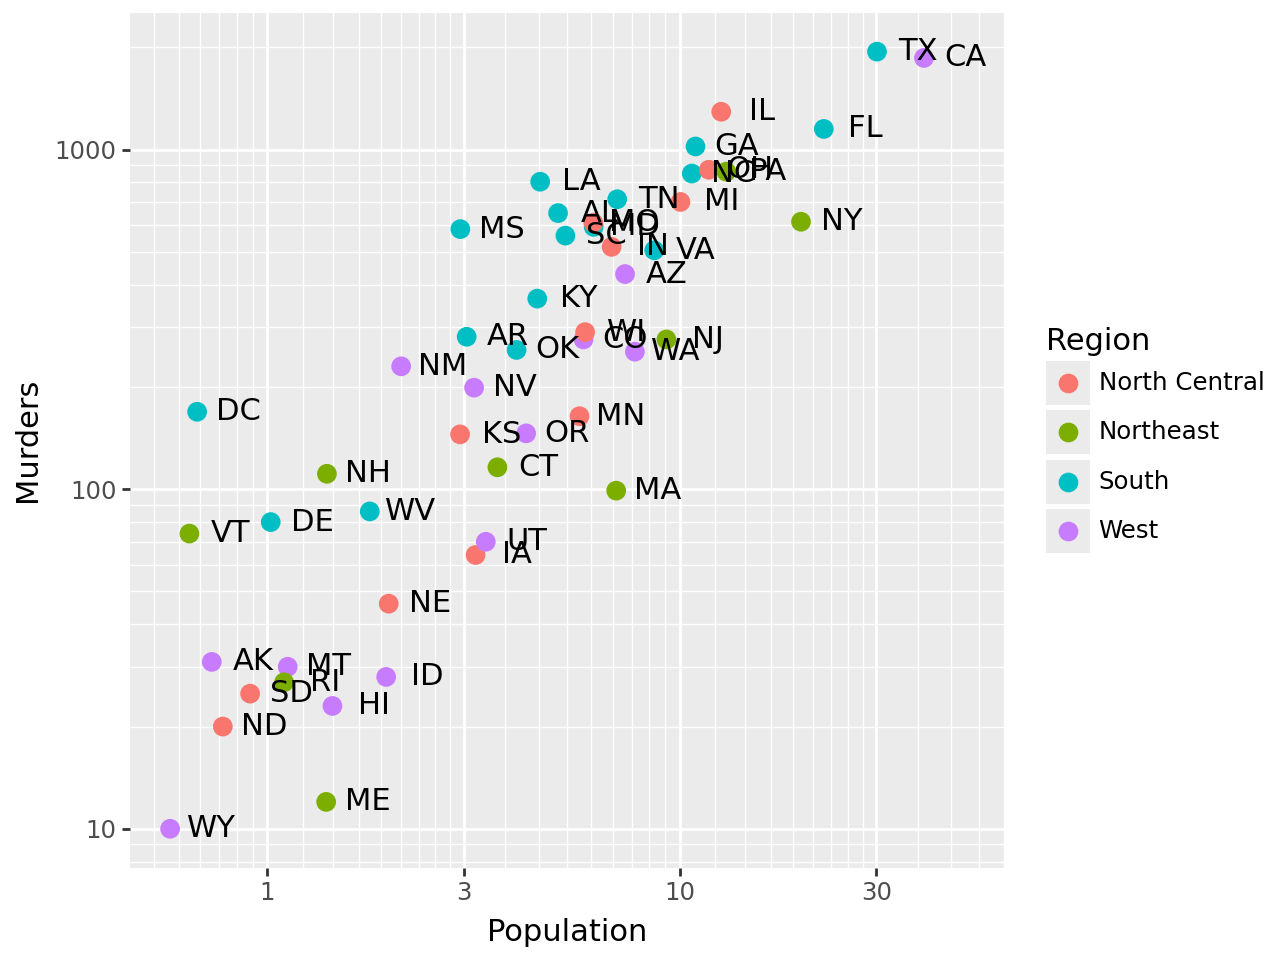

In [15]:
p3 = p2 + scale_x_log10() + scale_y_log10() 
p3

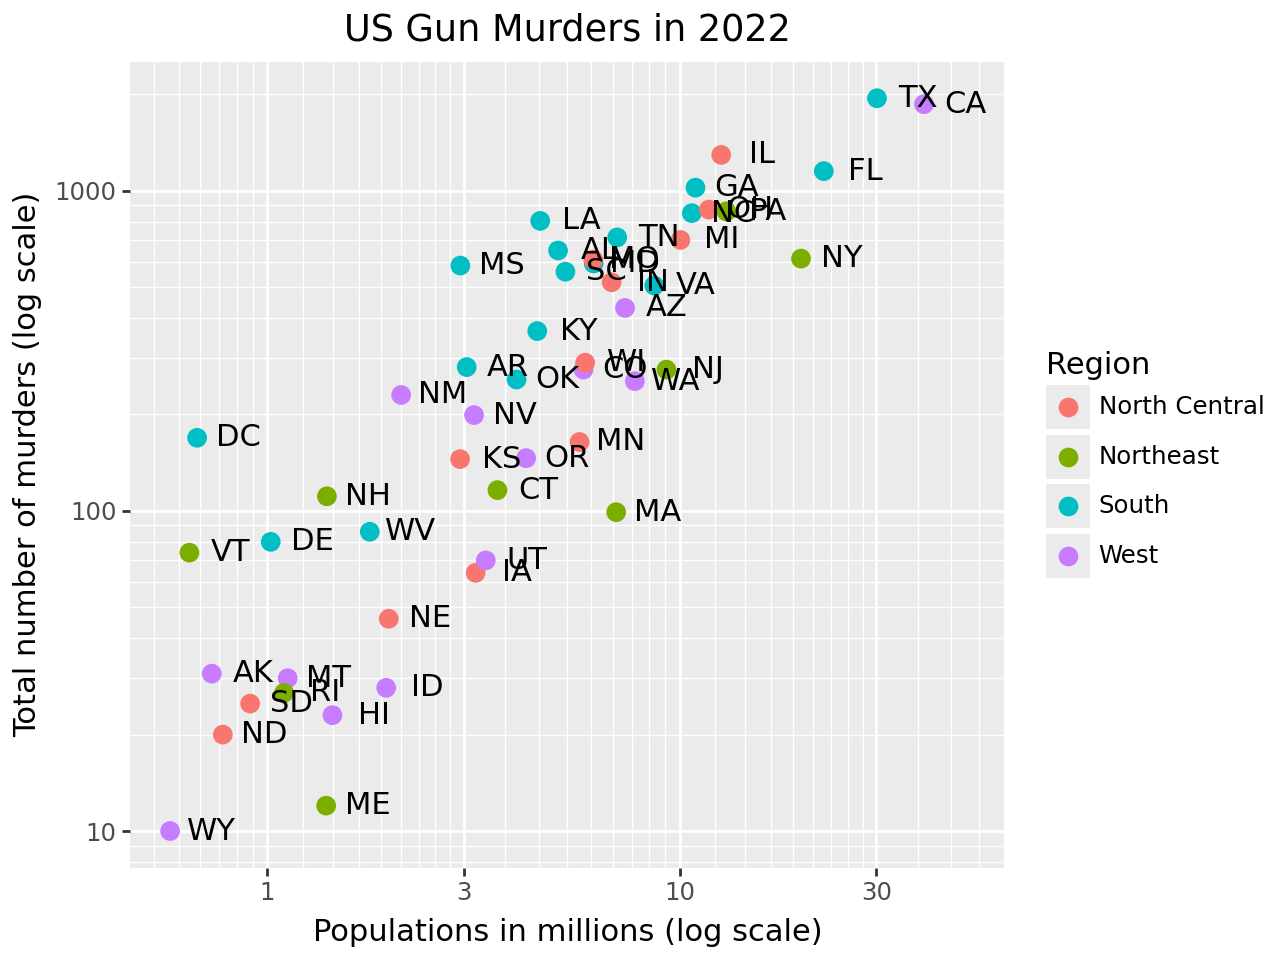

In [16]:
p4 = p3 + labs(title = "US Gun Murders in 2022",
                x = "Populations in millions (log scale)", 
                y = "Total number of murders (log scale)",
                color = "Region")
p4

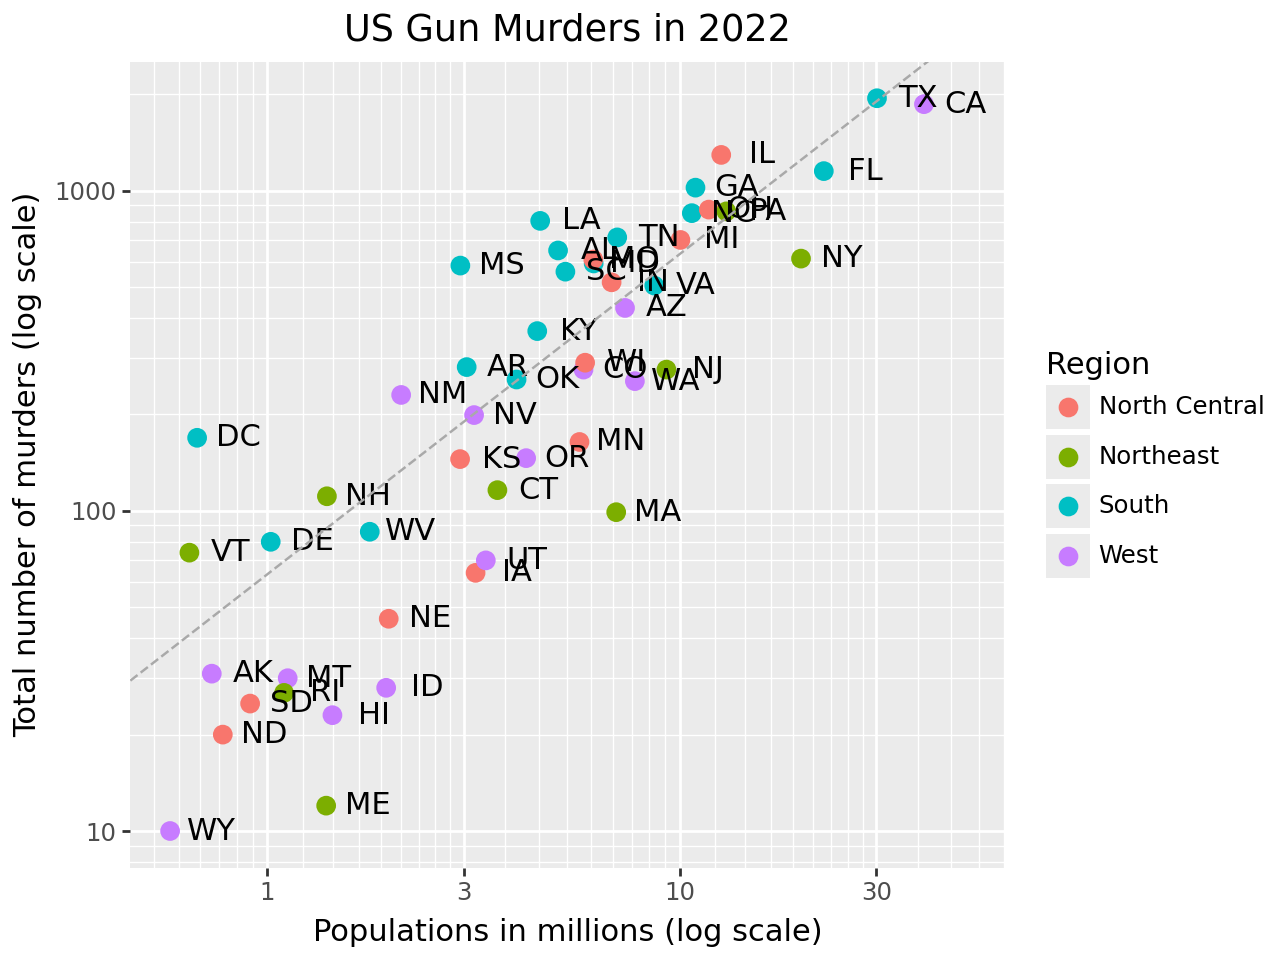

In [17]:
r = np.log10(sum(murders.Murders)/sum(murders.Population))
p5 = p4 + geom_abline(intercept = r, linetype='dashed', color = "darkgrey") 
p5

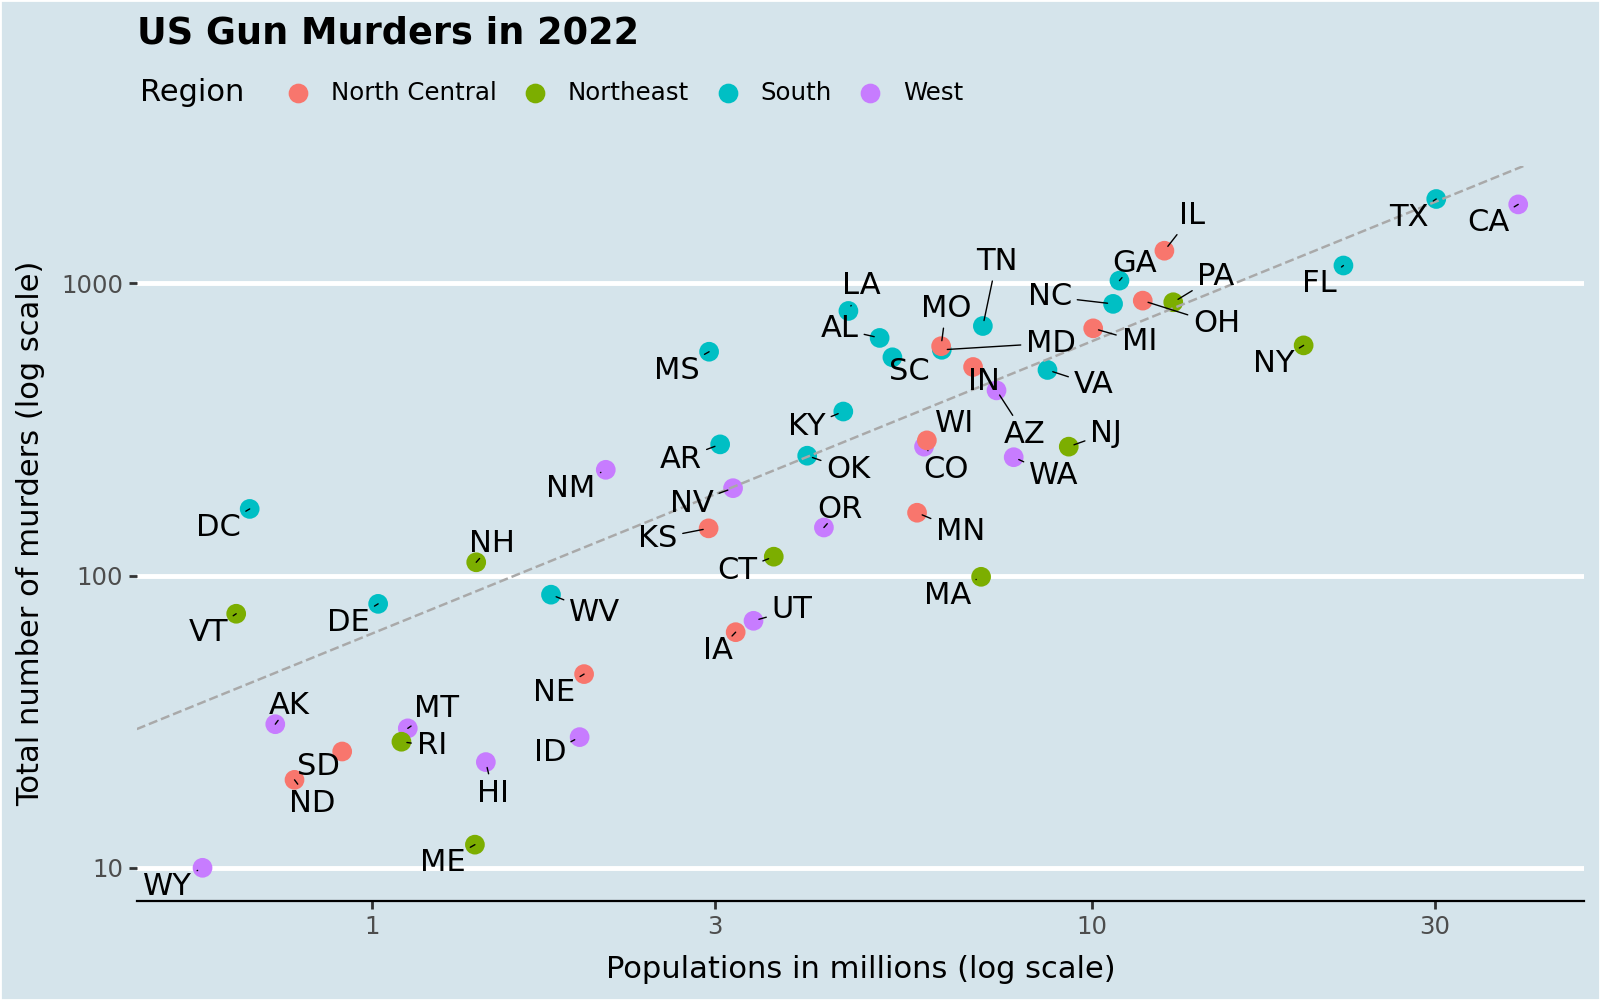

In [18]:
#All together with themes
my_theme = theme(plot_title = element_text(ha='left', face='bold'),legend_position='top', 
                 rect=element_rect(fill="#d5e4eb"), 
                 panel_grid_major_y = element_line(colour = "white", size = 1.75),
                 axis_line = element_line(size = 0.8),
                 axis_line_y = element_blank(),
                 axis_ticks_major = element_line(),
                 axis_ticks_y = element_blank(),
                 panel_grid_minor = element_blank(),  panel_grid_major_x = element_blank(),  panel_border = element_blank(), 
                 legend_justification=0, figure_size=(8,5))

p6 = murders >> (ggplot(aes(x='Population', y='Murders',label='State')) + 
                 geom_point( aes(color='Region'), size=3)+
                 geom_abline(intercept = r, linetype='dashed', color = "darkgrey") +
                 labs(x="Populations in millions (log scale)",  y="Total number of murders (log scale)",
                      title="US Gun Murders in 2022") +
                 scale_color_discrete(name = "Region") + scale_x_log10() + scale_y_log10() + 
                 geom_text(adjust_text={'arrowprops':dict(arrowstyle="-", lw=0.5), 'min_arrow_len':7}) +
                 my_theme)

p6

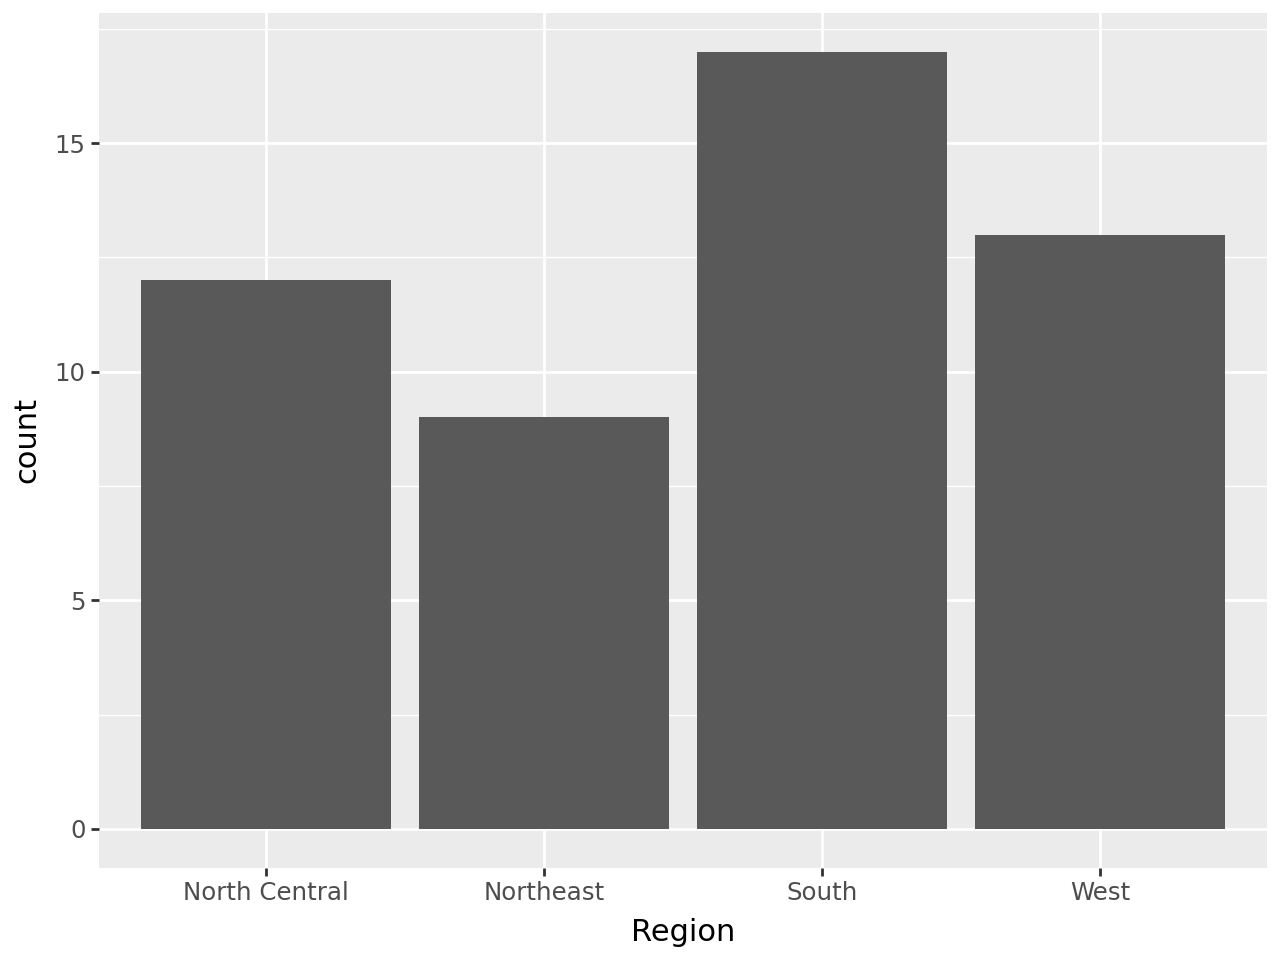

In [19]:
# Bars
murders >> ggplot(aes('Region')) + geom_bar()

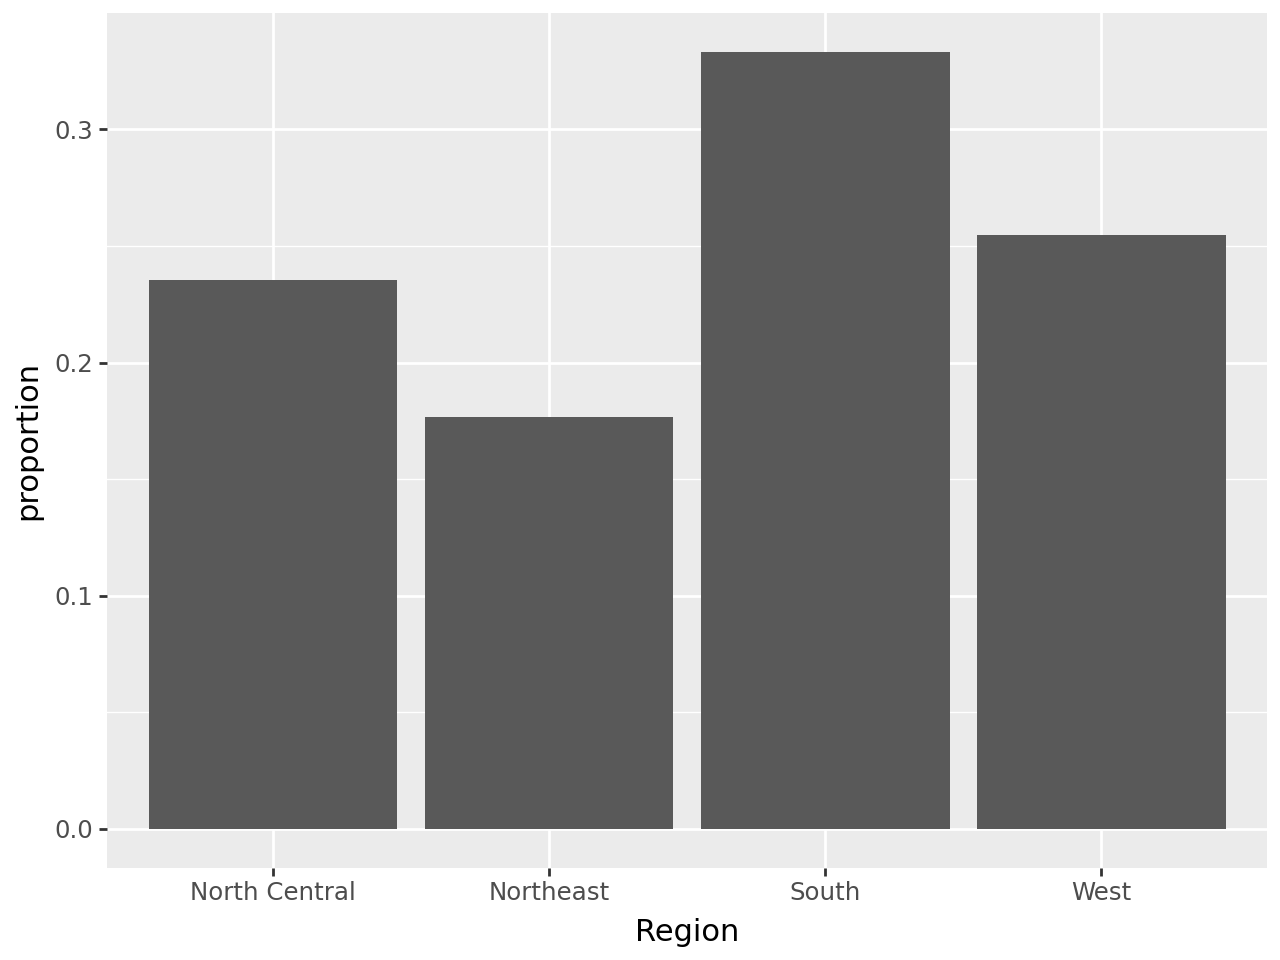

In [20]:
tab=murders['Region'].value_counts(normalize=True).reset_index()
tab >> ggplot(aes('Region', 'proportion'))+geom_col()

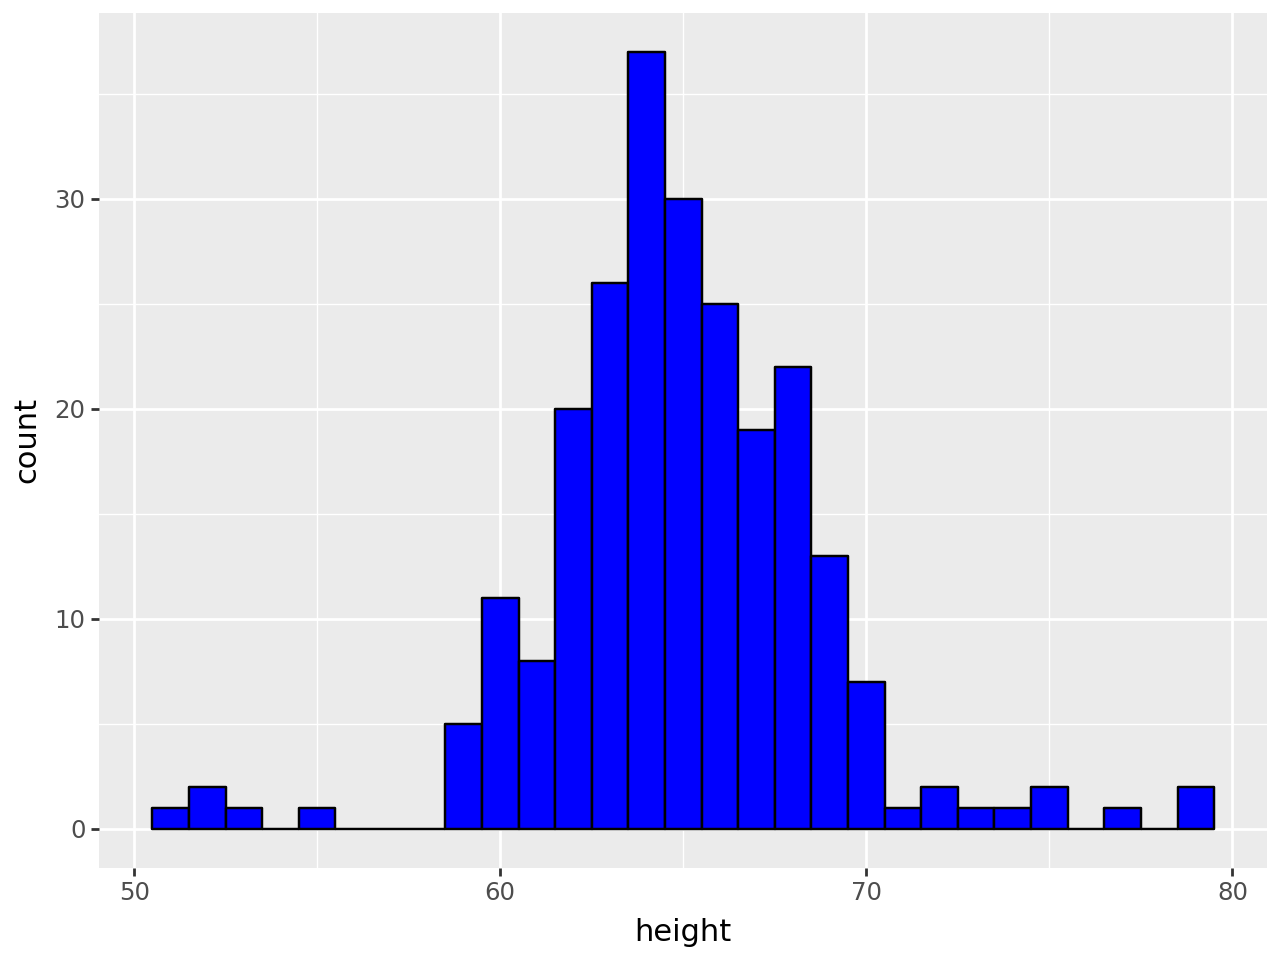

In [21]:
#Histograms
heights = pd.read_csv('./data/heights.csv')
heightsF = heights[heights.sex == "Female"].copy()

heightsF >> ( ggplot(aes("height")) + 
  geom_histogram(binwidth = 1, fill = "blue", color = "black")
)

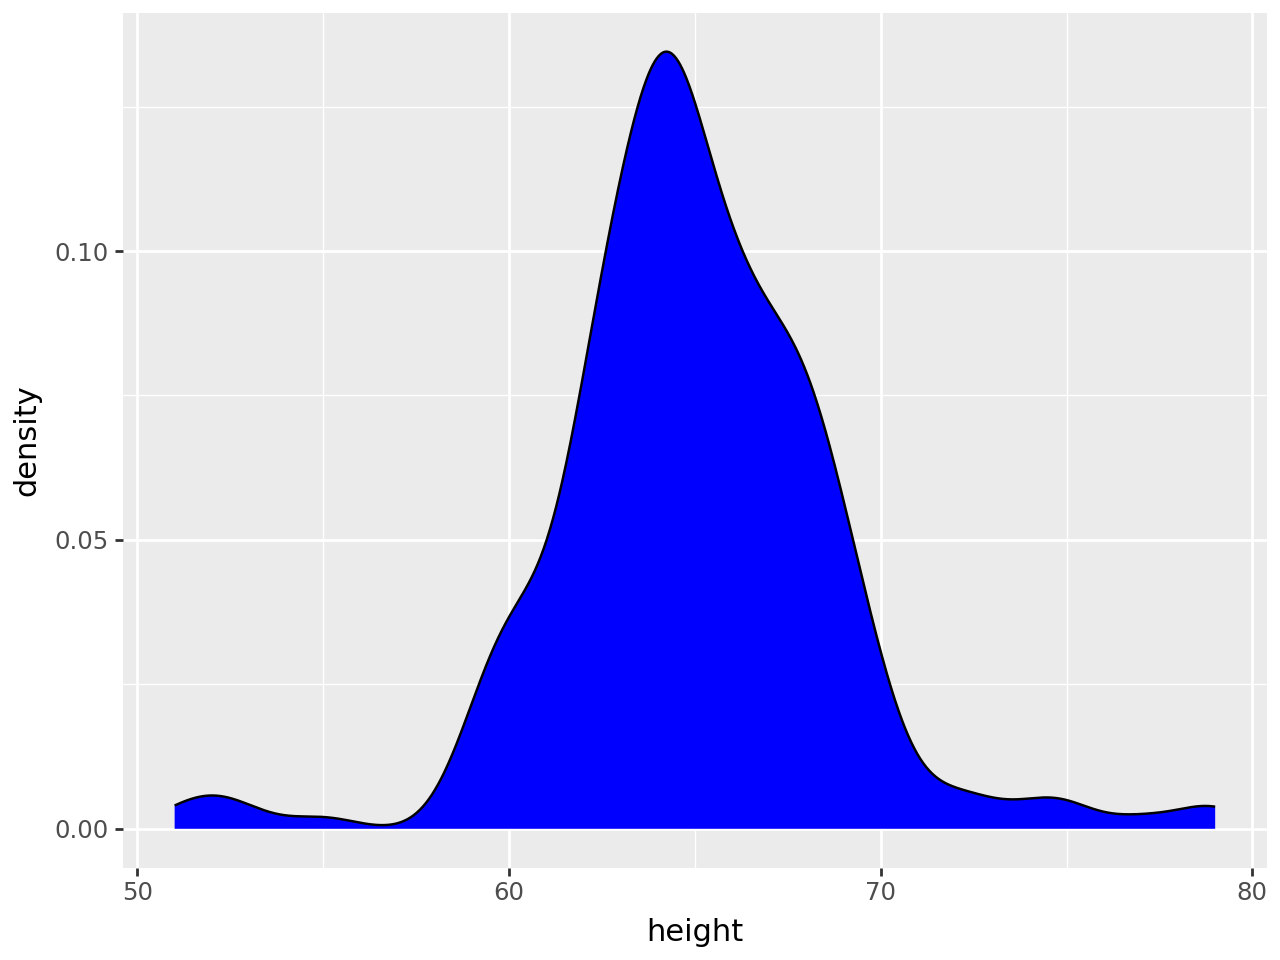

In [22]:
#Density plot
heightsF >>  ggplot(aes("height")) + geom_density( fill = "blue")

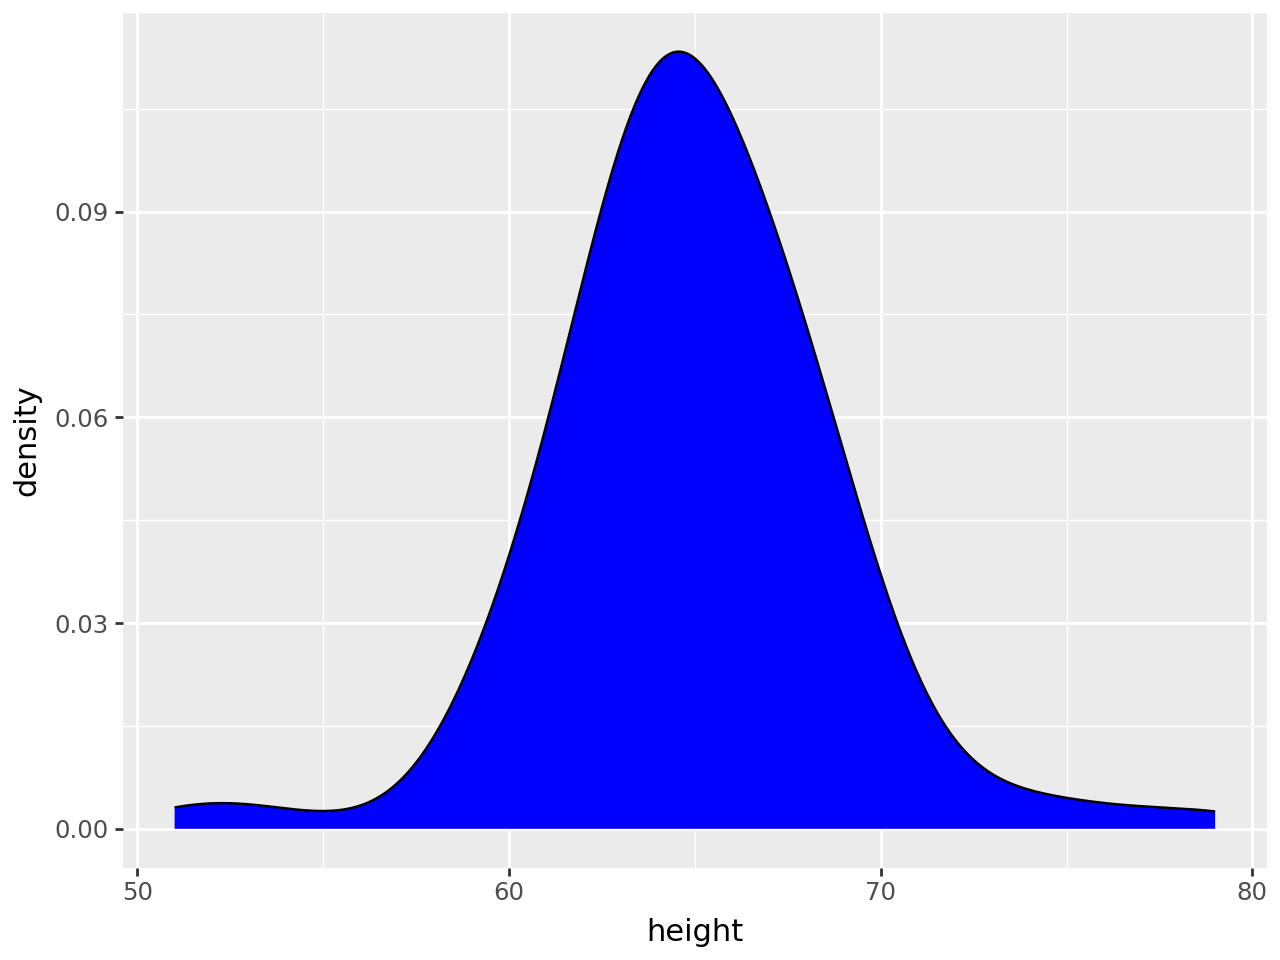

In [23]:
heightsF >> ggplot(aes("height")) + geom_density( fill = "blue", adjust=2)


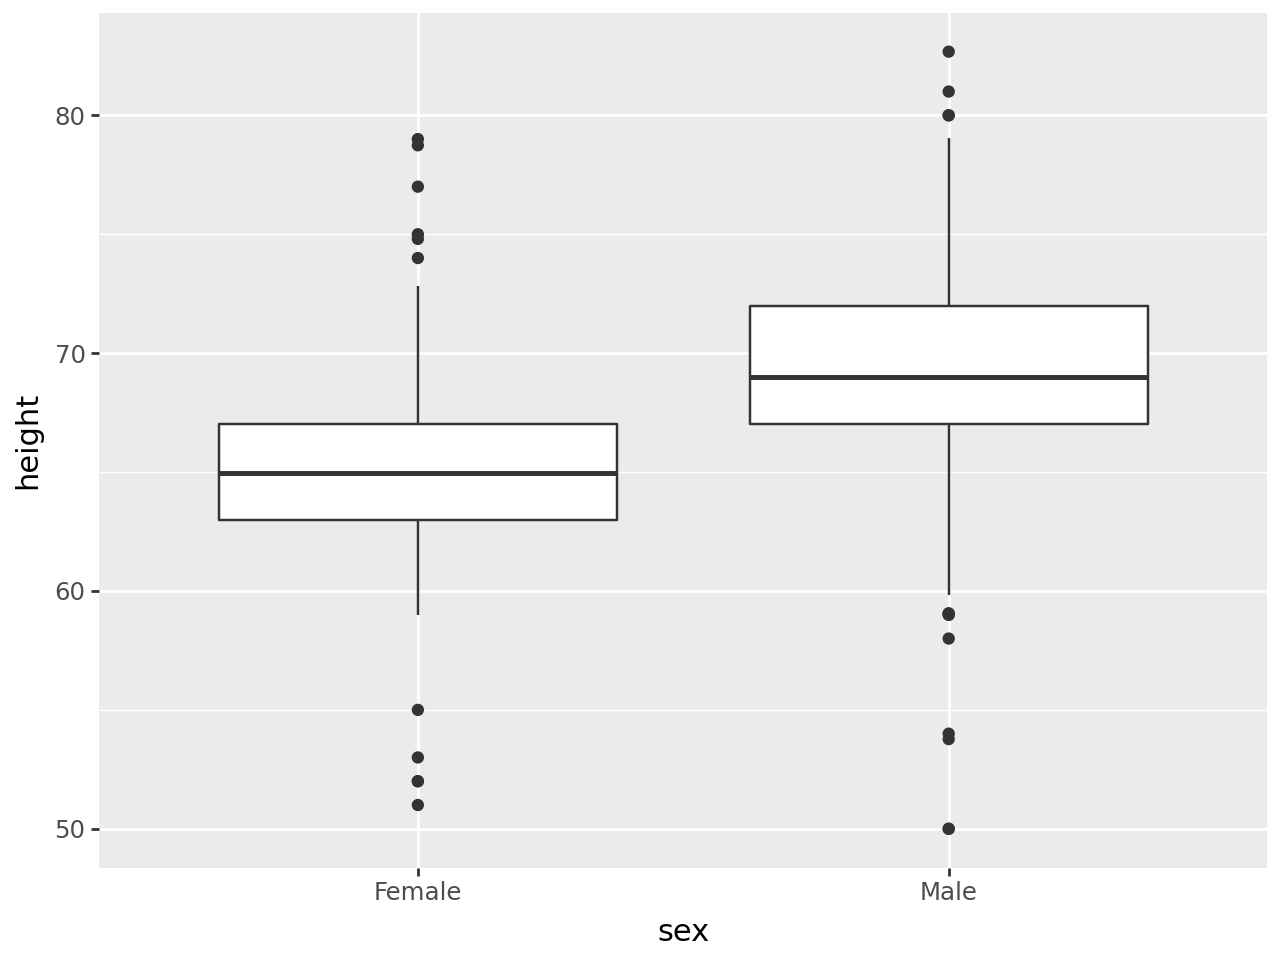

In [24]:
#Boxplots
heights >> ggplot(aes("sex", "height")) + geom_boxplot()

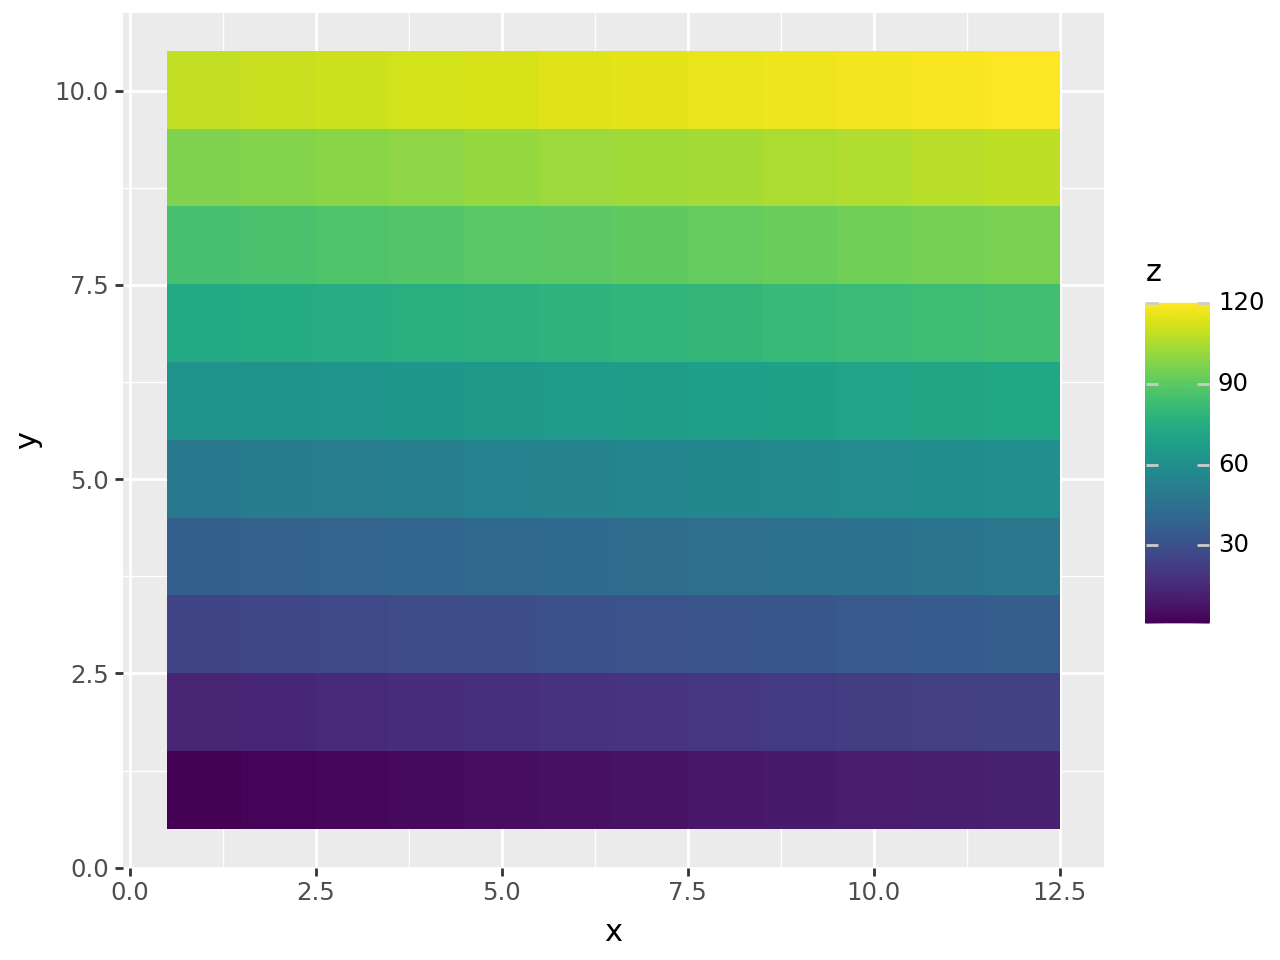

In [25]:
x,y = np.meshgrid(range(1,13),range(1,11))
X = pd.DataFrame({'x':x.reshape(120), 'y':y.reshape(120), 'z': np.arange(1,121)})

ggplot(X, aes('x', 'y', fill = 'z')) + geom_raster()

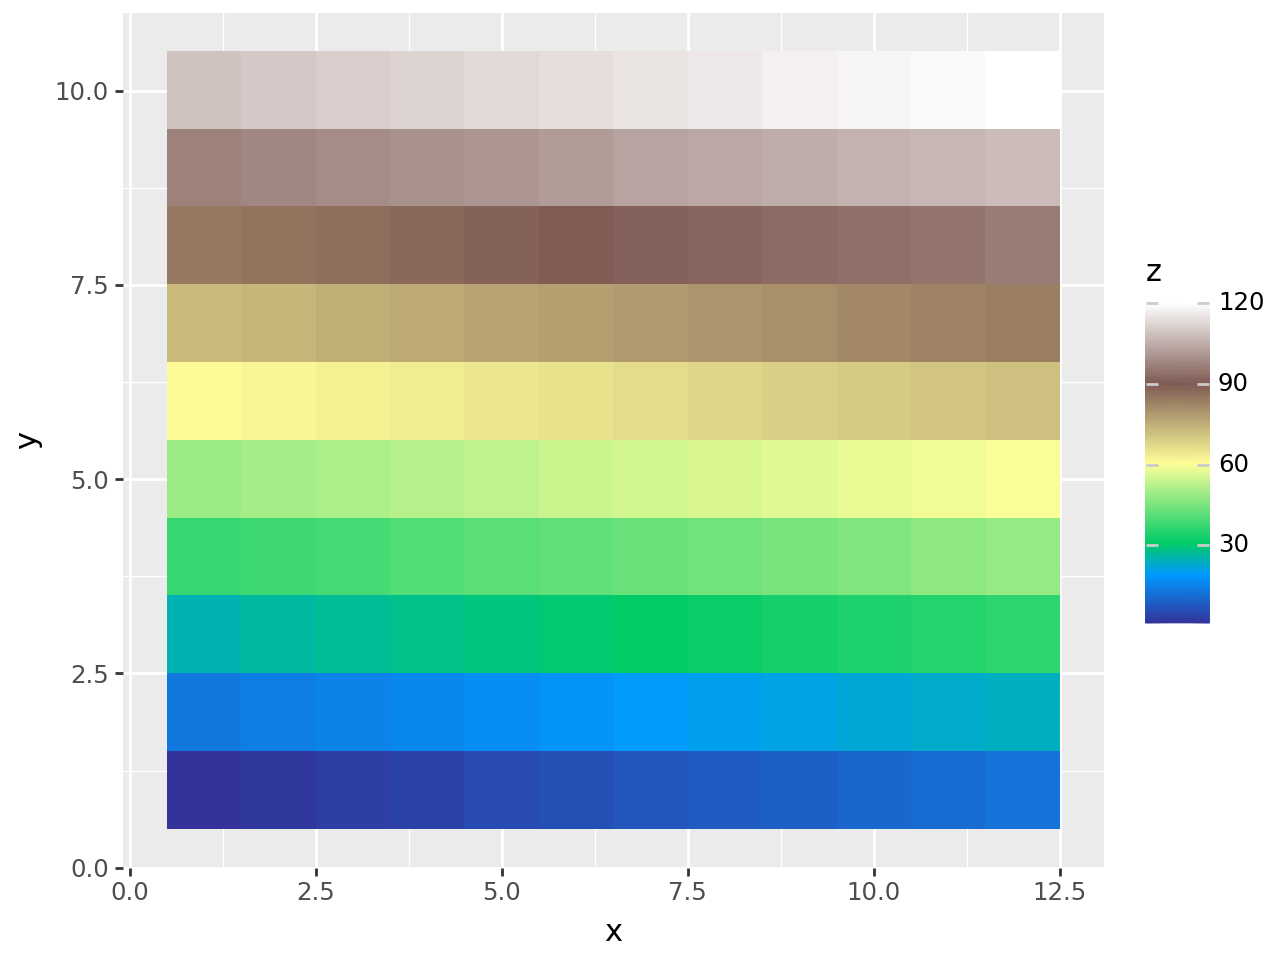

In [26]:
import matplotlib as mpl
cm = mpl.colormaps['terrain']  # case insensitive
( ggplot(X, aes('x', 'y', fill = 'z')) + geom_raster()+
    scale_fill_gradientn(colors =  cm(range(256)))
)

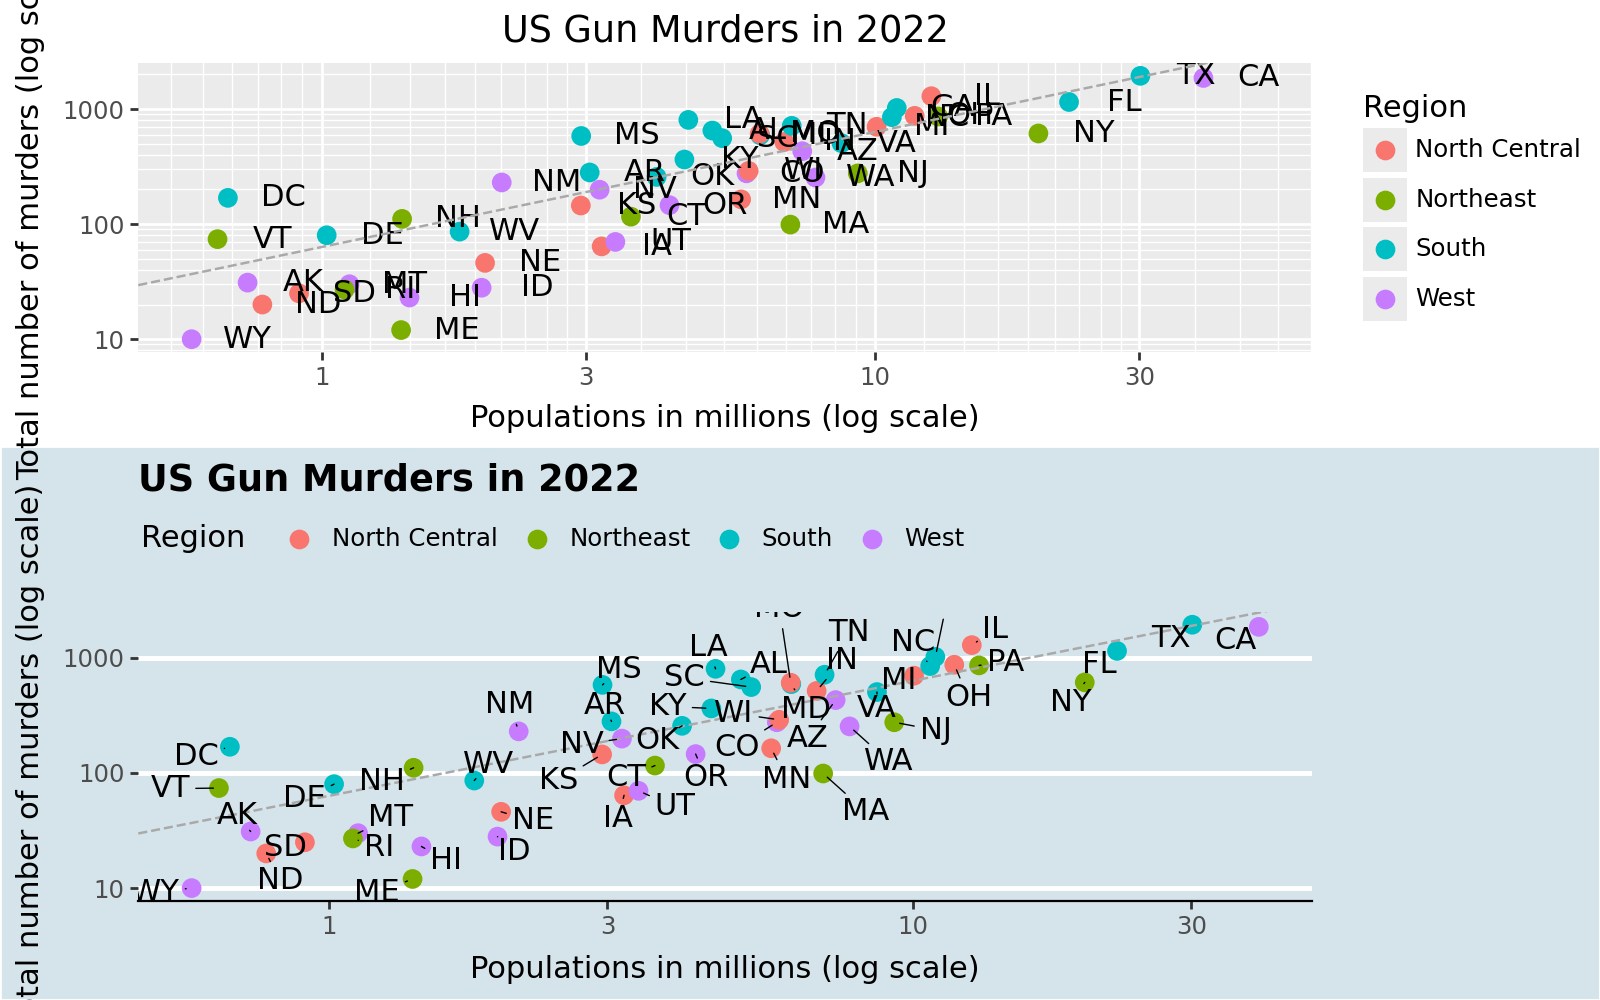

In [27]:
p5/p6